### House Prices - Advanced Regression Techniques - FINAL PROJECT

### Team:
1. Deeptha Theyyar Maalolan - dt375@njit.edu
2. Swathi Muralinathan - sm3345@njit.edu
3. Deva Rohinth Alagu Aumugam - da585@njit.edu

In [105]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [106]:
houses_csv = pd.read_csv("Datasets/train.csv")
display(f"shape of the dataset {houses_csv.shape}", houses_csv.head(3))

'shape of the dataset (1460, 81)'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [107]:
houses_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [108]:
houses_csv.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [109]:
houses_csv.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### Detecting Missing Data

In [110]:

missing_data_from_csv = houses_csv.isnull().sum().sort_values(ascending=False)

# Percent missing_data in each column
percent = (houses_csv.isnull().sum()/houses_csv.isnull().count()).sort_values(ascending=False)

missing_columns = missing_data_from_csv[missing_data_from_csv > 0]

# Display columns with missing data
missing_data_from_csv = pd.concat([missing_data_from_csv, percent], axis=1, keys=['Total', 'Percent'])

missing_data_from_csv.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [111]:

houses_csv.loc[:, missing_columns.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageType       object
GarageFinish     object
GarageQual       object
BsmtFinType2     object
BsmtExposure     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

### Detecting Outliers

In [112]:
houses_csv.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [113]:

houses_csv.drop(columns="Id").select_dtypes(include=['number']).columns.shape[0]

37

Outoutliers in each column


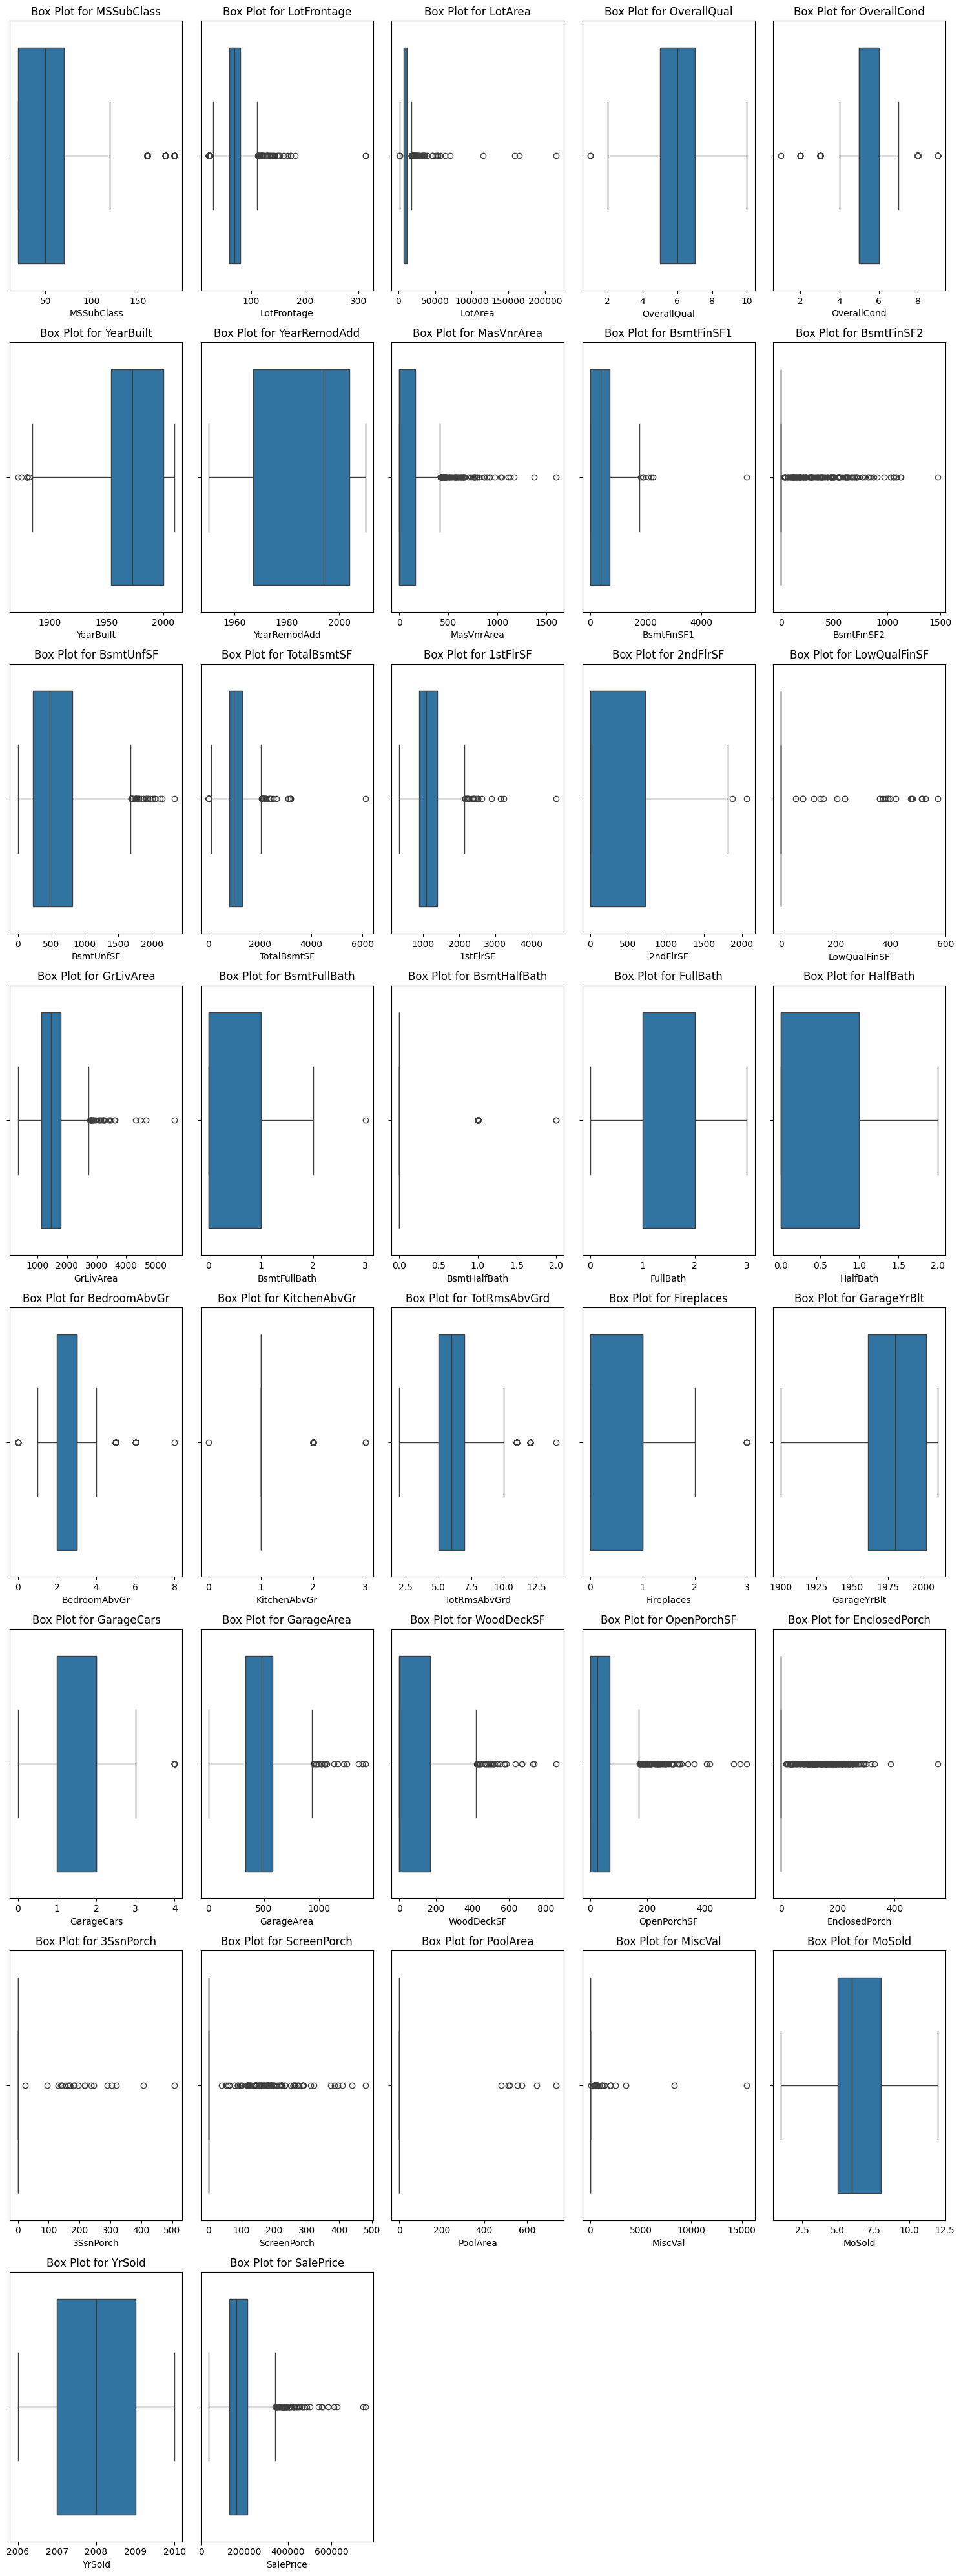

In [114]:
print("Outoutliers in each column")

features = houses_csv.drop(columns="Id").select_dtypes(include=['number'])

# Determine the number of rows and columns for the grid layout
num_features = len(features.columns)
num_rows = 8  
num_cols = 5 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))


axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(features.columns):
    if i < num_features:
        sns.boxplot(x=houses_csv[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


for i in range(len(features.columns), len(axes)):
    fig.delaxes(axes[i])
    

plt.tight_layout()


plt.show()

### Correlation analysis

In [115]:
houses_csv.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [116]:
houses_csv.drop(columns="Id").select_dtypes(include=['number']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: >

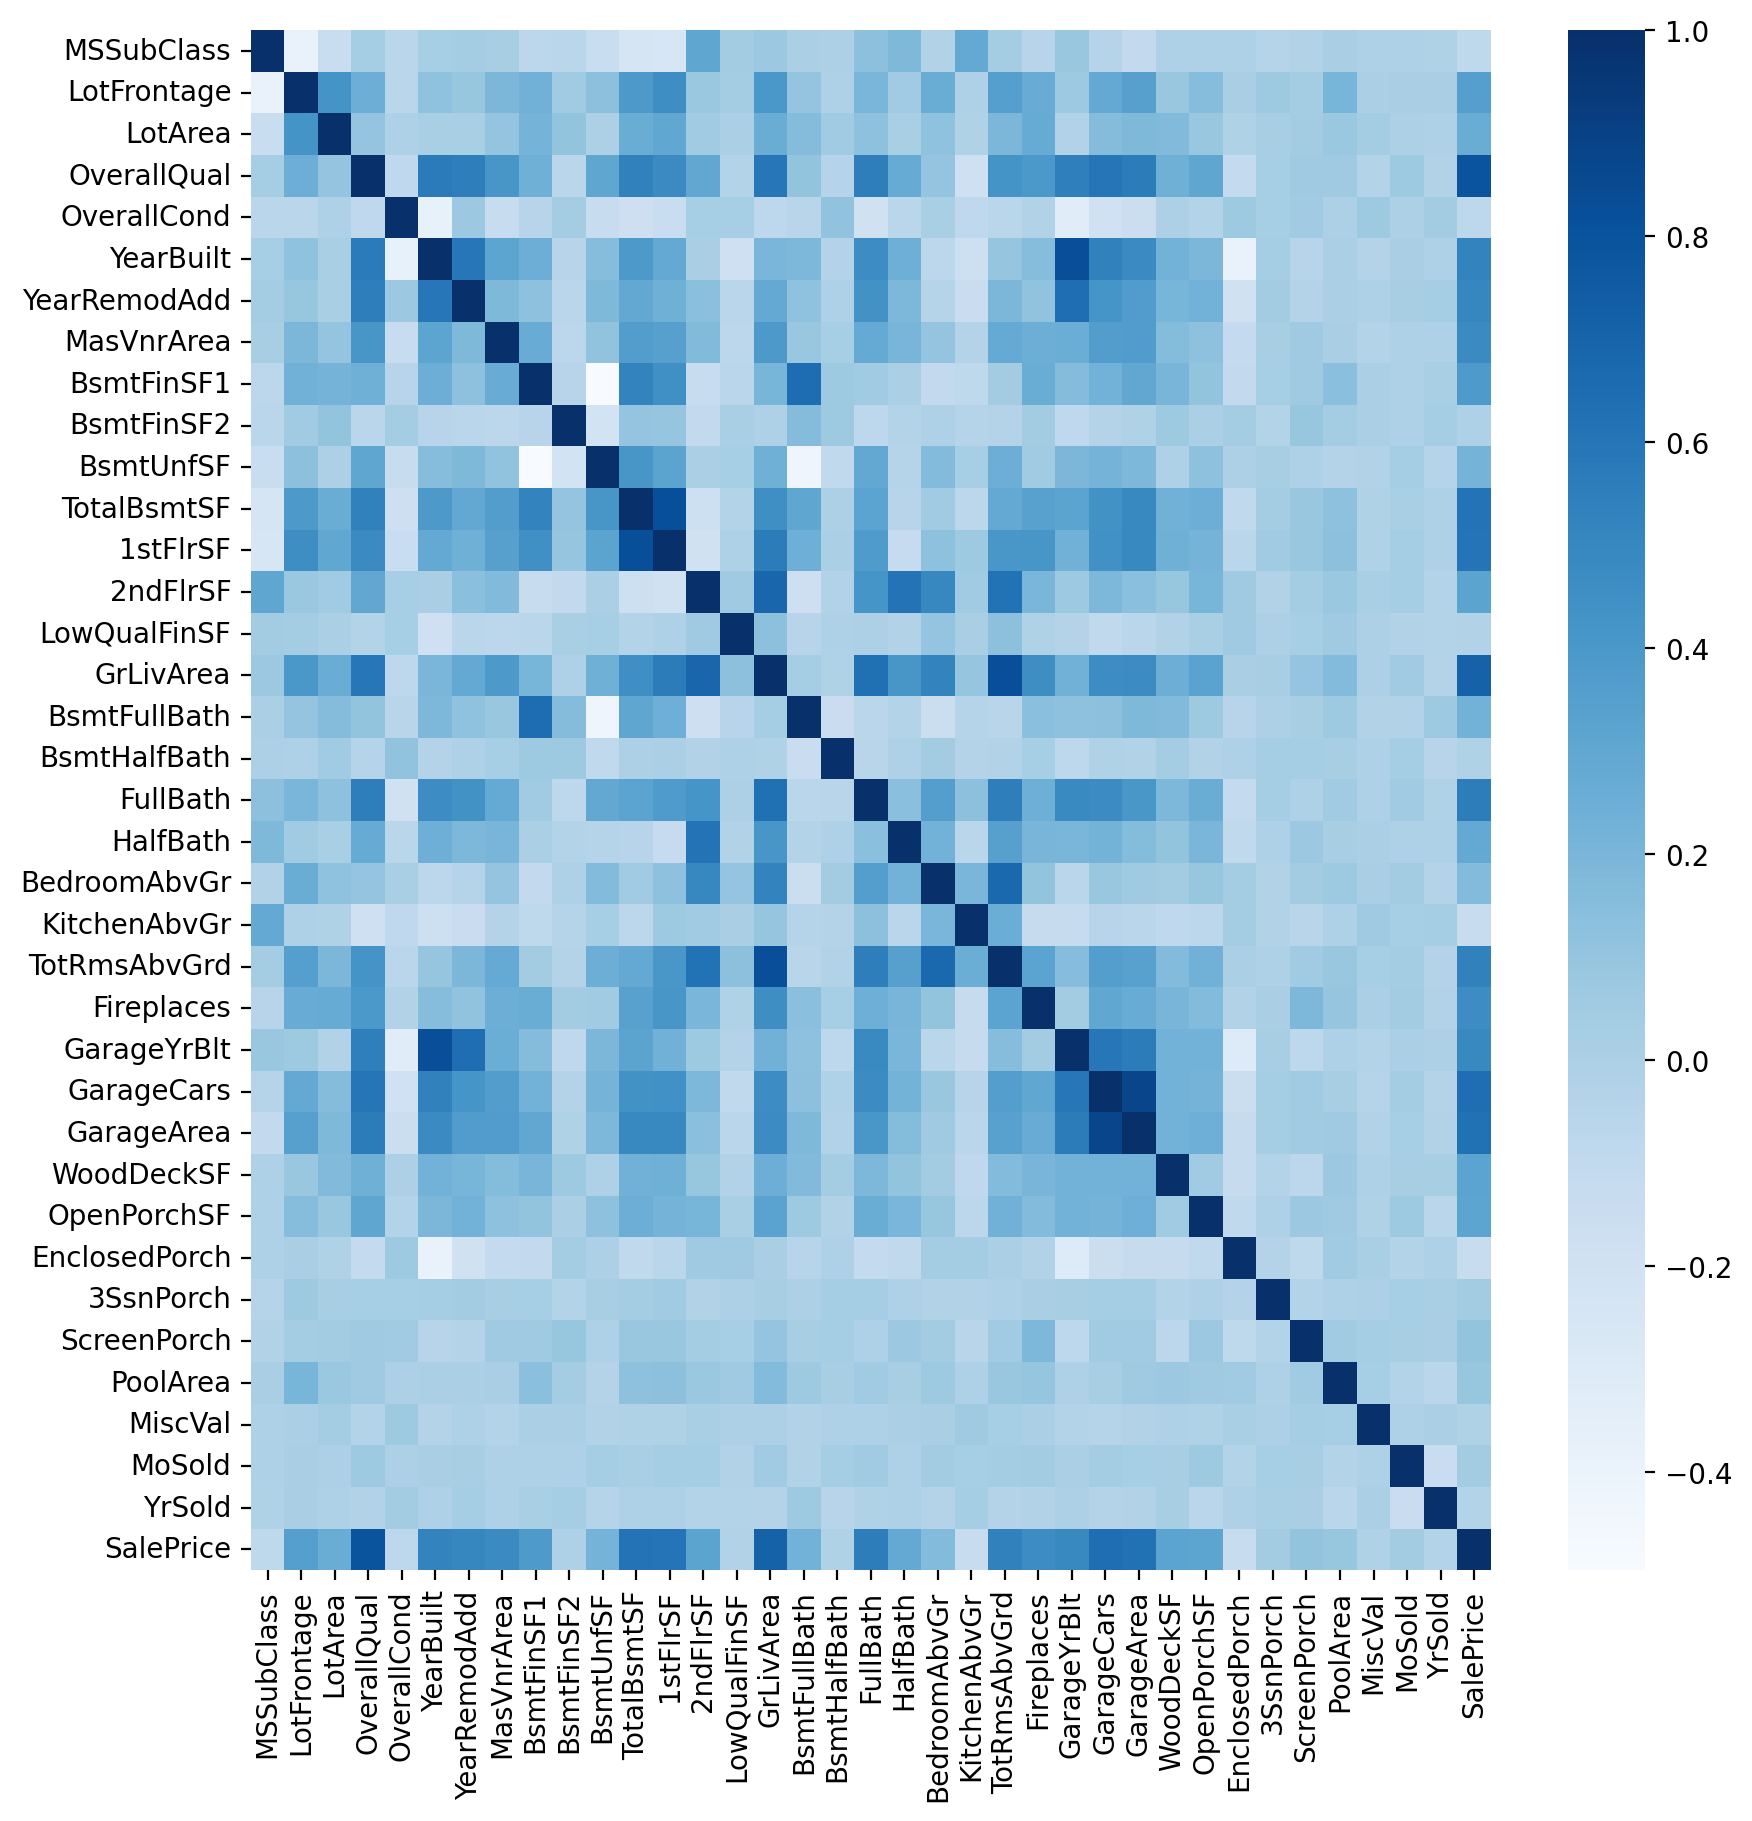

In [117]:
# Correlation matrix 
correlation = houses_csv.drop(columns='Id').corr(numeric_only=True)

plt.figure(figsize=(10,10), dpi=200)

sns.heatmap(correlation, cmap="Blues")

In [118]:
corr=correlation["SalePrice"].apply(abs).sort_values(ascending=False).reset_index()
print(corr.shape)
corr

(37, 2)


,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


## Cleaning and Preparing the data

### Feature Selection

In [119]:
houses_csv = houses_csv.drop((missing_data_from_csv[missing_data_from_csv['Total'] > 81]).index,axis=1) # will remove 7 feature
houses_csv = houses_csv.drop(houses_csv.loc[houses_csv['Electrical'].isnull()].index) # remove one row that contain NaN
print(f"shape after delete columns that has NaN greater than 81 value: {houses_csv.shape}")
houses_csv.isnull().sum().max()

shape after delete columns that has NaN greater than 81 value: (1459, 75)


81

In [120]:
print(f"before deleting weak correlation => {houses_csv.shape}")
houses_csv = houses_csv.drop(corr.iloc[21: , 0].values,axis=1)
print(f"after deleting weak correlation => {houses_csv.shape}")

before deleting weak correlation => (1459, 75)
after deleting weak correlation => (1459, 59)


### Dealing with missing data

In [121]:
name_of_coll = houses_csv.drop(columns="Id").select_dtypes(include=['number']).columns

# fillna in each column using sample()
for col in name_of_coll :
    nan_indices = houses_csv[col].isnull() # find place(index) of NaN
    random_samples = houses_csv[col].dropna().sample(n=nan_indices.sum(), replace=True)
    houses_csv.loc[nan_indices, col] = random_samples.values

col_has_numbers = houses_csv.drop(columns="Id").select_dtypes(include=['number'])
col_has_numbers.isnull().sum().sort_values(ascending=False)

LotArea         0
OverallQual     0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
SalePrice       0
dtype: int64

In [122]:
name_of_coll = houses_csv.drop(columns="Id").select_dtypes(include=['object']).columns

for col in name_of_coll :
    mode_for_coll = houses_csv[col].mode()[0]
    houses_csv[col].fillna(mode_for_coll, inplace=True)
    

col_has_numbers = houses_csv.drop(columns="Id").select_dtypes(include=['object'])
col_has_numbers.isnull().sum().sort_values(ascending=False)

MSZoning         0
Electrical       0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Street           0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
SaleCondition    0
dtype: int64

### Dealing with outliers 

In [123]:
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    dataframe.loc[(dataframe[col]>upper,col)]=upper
    dataframe.loc[(dataframe[col]<lower,col)]=lower 
    return dataframe


for col in houses_csv.drop(columns="Id").select_dtypes(include=["number"]).columns :
    houses_csv = handle_outliers(houses_csv, col)

After removing the outliners


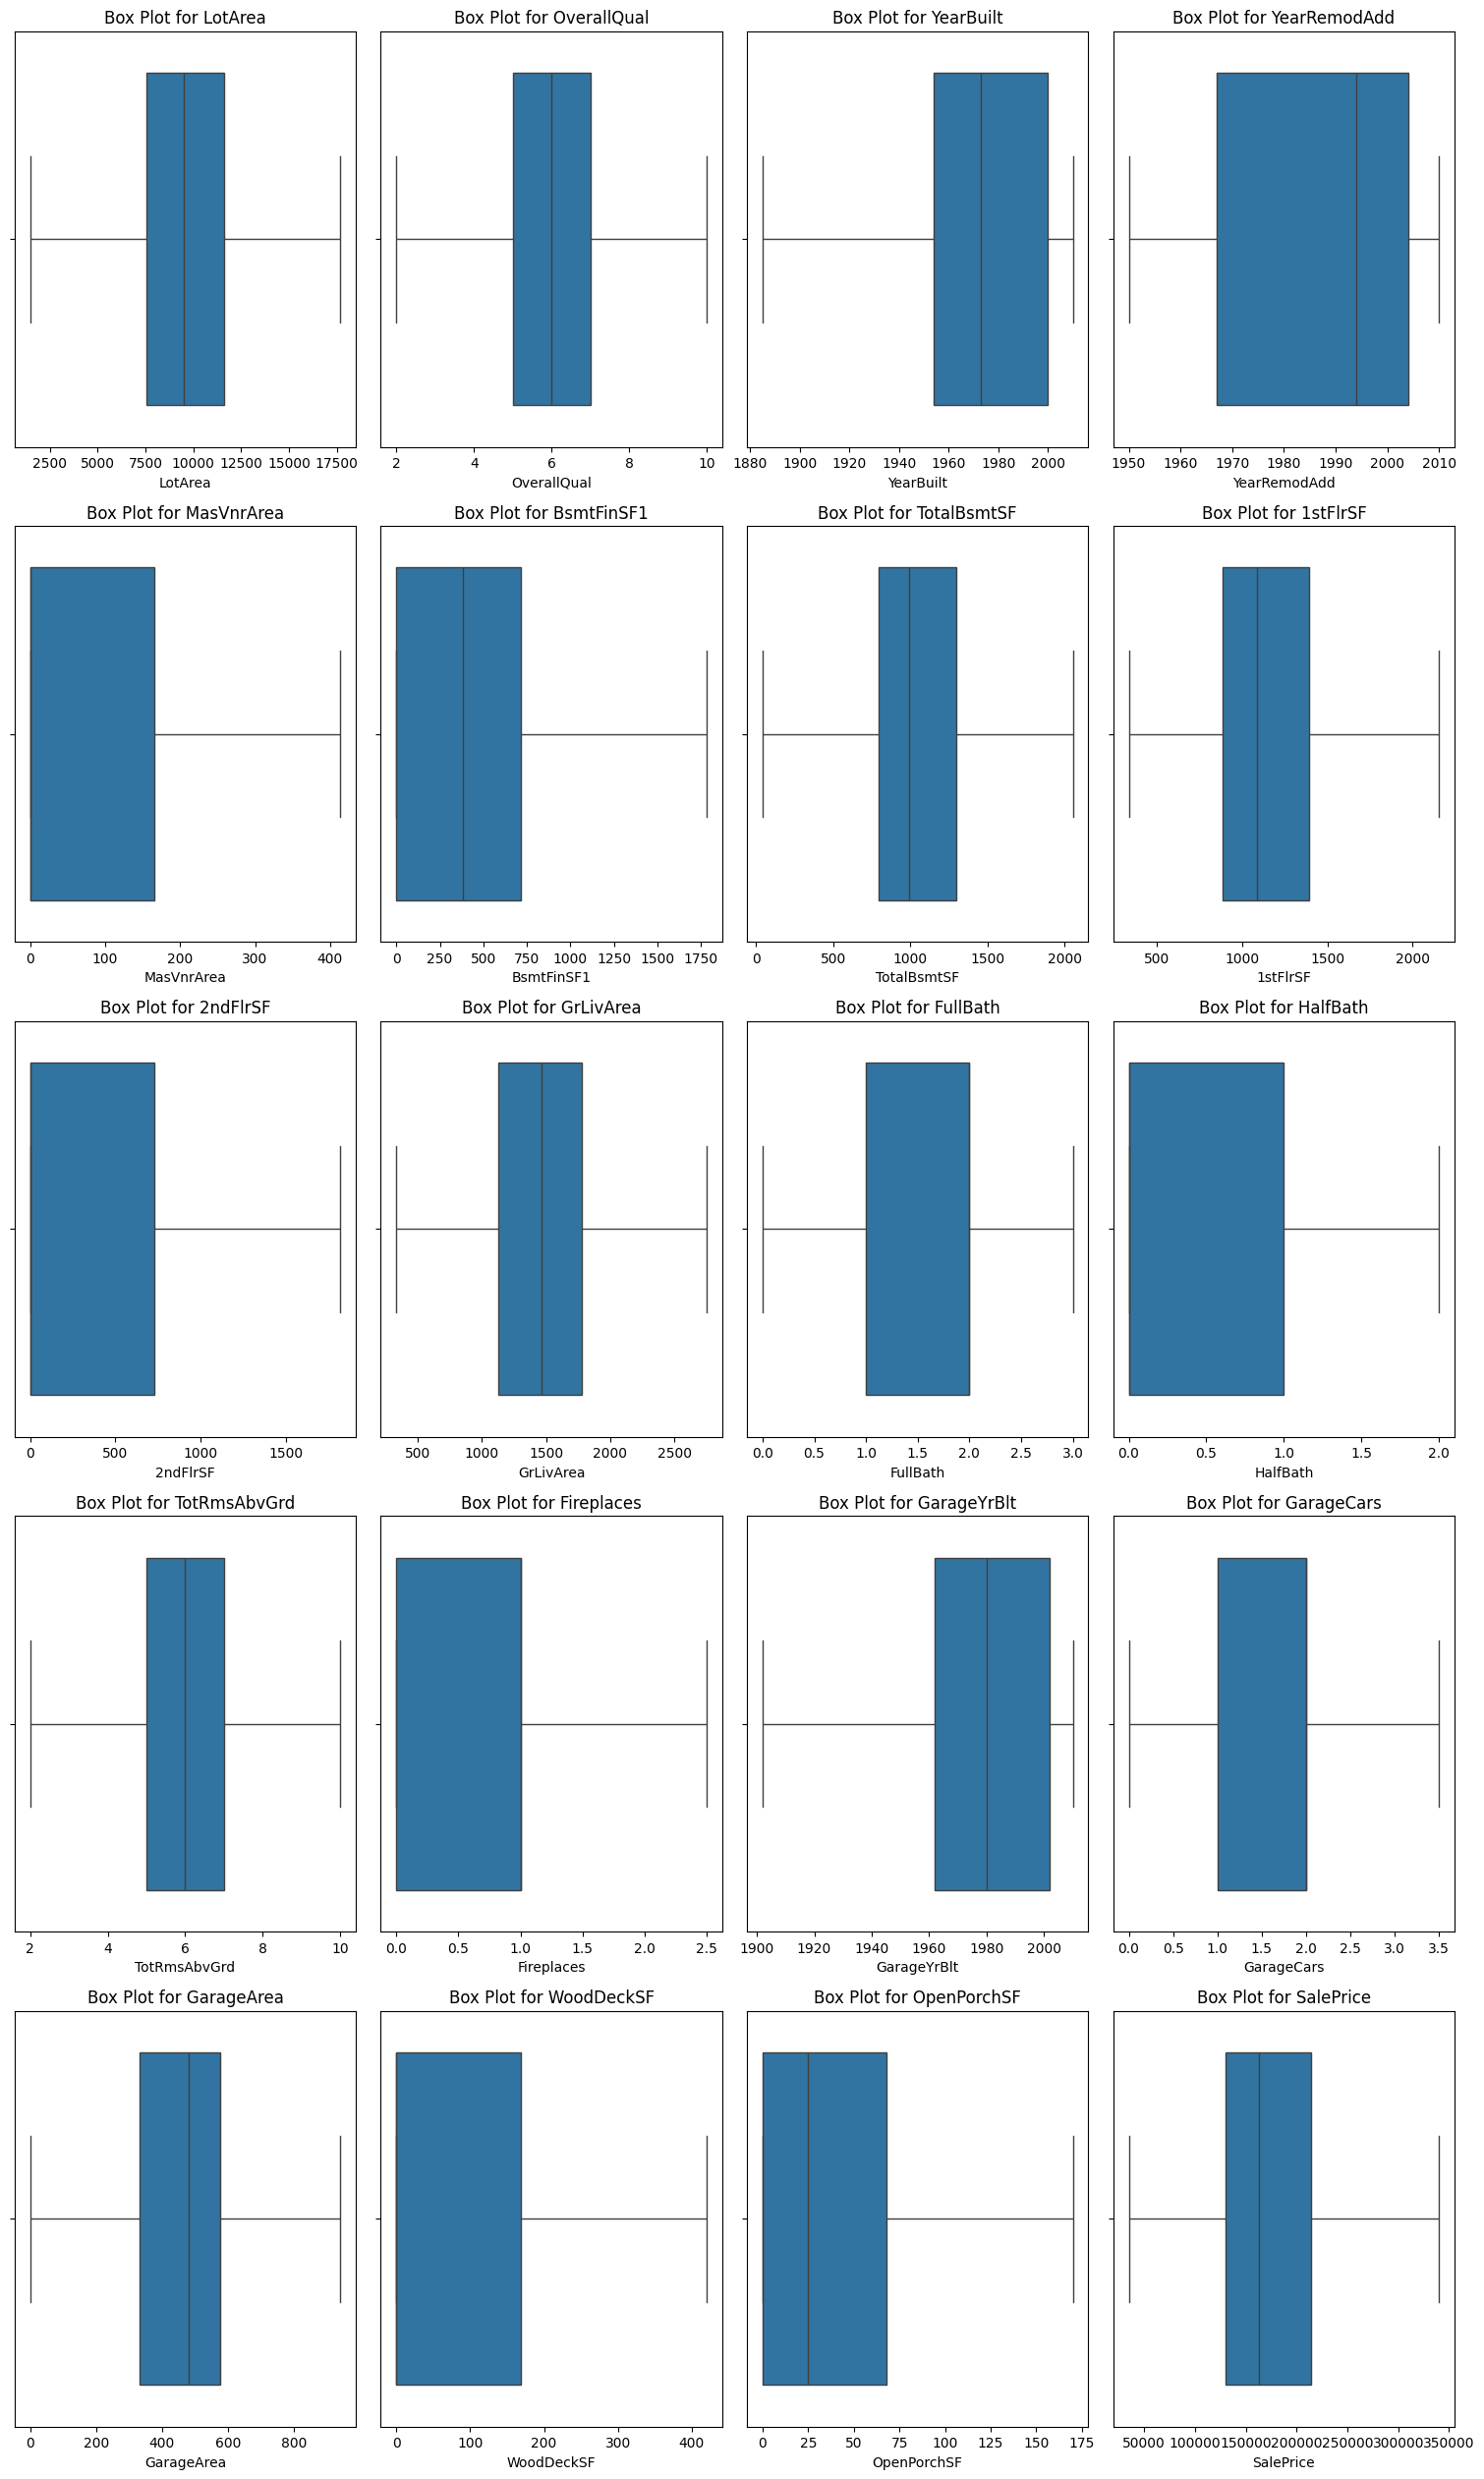

In [124]:
print("After removing the outliners")

features = houses_csv.drop(columns="Id").select_dtypes(include=['number'])

num_features = len(features.columns)
num_rows = 8  
num_cols = 4  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))


axes = axes.flatten()

for i, column in enumerate(features.columns):
    if i < num_features:
        sns.boxplot(x=houses_csv[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


for i in range(len(features.columns), len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

### Feature Encoding

In [125]:
obj_col = houses_csv.drop(columns="Id").select_dtypes(include=['object']).columns
obj_col = pd.DataFrame(obj_col,columns=["text col"])
print(f"number of column that have text => {obj_col.shape}")
obj_col

number of column that have text => (38, 1)


,text col
0,MSZoning
1,Street
2,LotShape
3,LandContour
4,Utilities
5,LotConfig
6,LandSlope
7,Neighborhood
8,Condition1
9,Condition2


In [126]:
# Using labelEncoder to convert objects
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in obj_col.values.flatten():
    houses_csv[col]= encoder.fit_transform(houses_csv[col])

In [127]:
houses_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   int32  
 4   LotShape       1459 non-null   int32  
 5   LandContour    1459 non-null   int32  
 6   Utilities      1459 non-null   int32  
 7   LotConfig      1459 non-null   int32  
 8   LandSlope      1459 non-null   int32  
 9   Neighborhood   1459 non-null   int32  
 10  Condition1     1459 non-null   int32  
 11  Condition2     1459 non-null   int32  
 12  BldgType       1459 non-null   int32  
 13  HouseStyle     1459 non-null   int32  
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   float64
 17  RoofStyle      1459 non-null   int32  
 18  RoofMatl

### Linear Regression Model Building and Enhancing

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [129]:
X = houses_csv.iloc[:, :-1].values
y = houses_csv.iloc[:, -1:].values

# Split data to train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True,with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
houses_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   int32  
 4   LotShape       1459 non-null   int32  
 5   LandContour    1459 non-null   int32  
 6   Utilities      1459 non-null   int32  
 7   LotConfig      1459 non-null   int32  
 8   LandSlope      1459 non-null   int32  
 9   Neighborhood   1459 non-null   int32  
 10  Condition1     1459 non-null   int32  
 11  Condition2     1459 non-null   int32  
 12  BldgType       1459 non-null   int32  
 13  HouseStyle     1459 non-null   int32  
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   float64
 17  RoofStyle      1459 non-null   int32  
 18  RoofMatl

In [132]:
# Cross-validated scores
cv = KFold(n_splits=5, shuffle=True, random_state=42)
validation_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=cv)
print("Cross validation scores:", validation_scores)
print(f"Mean accuacy for Cross-validated: {validation_scores.mean()}")

Cross validation scores: [0.89271663 0.87599902 0.8536562  0.84720453 0.8630663 ]
Mean accuacy for Cross-validated: 0.8665285339446183


In [133]:
results = {}

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"test score: {model.score(X_test, y_test)}")

test score: 0.9010505368602223


In [134]:
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"R^2: {r2}")
print(f"MAPE: {mape}")
results["Linear Regression"] = {'MAPE': mape, 'R^2': r2}

R^2: 0.9010505368602223
MAPE: 0.10952060188684652


### knnRegressor

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              "p" : [1,2]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 7, 'p': 1}


In [136]:
knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [137]:
cross_validation_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
average_score = cross_validation_scores.mean()
print(f"Cross Validation score:{average_score}")

Cross Validation score:0.8377420568836245


In [138]:
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"R^2: {r2}")
print(f"MAPE: {mape}")
results["KNN Regressor"] = {'MAPE': mape, 'R^2': r2}

R^2: 0.8696412908659867
MAPE: 0.11989229383017824
